In [1]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x: torch.Tensor):
        return self.linear(x)

In [6]:
# Generate random data for demonstration
np.random.seed(42)
X = np.random.randn(10,1) * 10
y = 2 * X + 3 + np.random.randn(10,1) * 2
X,y

(array([[ 4.96714153],
        [-1.38264301],
        [ 6.47688538],
        [15.23029856],
        [-2.34153375],
        [-2.34136957],
        [15.79212816],
        [ 7.67434729],
        [-4.69474386],
        [ 5.42560044]]),
 array([[12.00744767],
        [-0.69674553],
        [16.43769531],
        [29.63403664],
        [-5.13290316],
        [-2.8073142 ],
        [32.55859407],
        [18.97718925],
        [-8.20553587],
        [11.02659347]]))

In [7]:
X_tensor = torch.from_numpy(X.astype(np.float32))
y_tensor = torch.from_numpy(y.astype(np.float32))
X_tensor, y_tensor

(tensor([[ 4.9671],
         [-1.3826],
         [ 6.4769],
         [15.2303],
         [-2.3415],
         [-2.3414],
         [15.7921],
         [ 7.6743],
         [-4.6947],
         [ 5.4256]]),
 tensor([[12.0074],
         [-0.6967],
         [16.4377],
         [29.6340],
         [-5.1329],
         [-2.8073],
         [32.5586],
         [18.9772],
         [-8.2055],
         [11.0266]]))

Define the model

In [8]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# Define loss function and optimizer
criterion = nn.MSELoss():

nn.MSELoss() creates an instance of the Mean Squared Error (MSE) loss function provided by PyTorch.
The Mean Squared Error loss is commonly used in regression problems, including linear regression. It calculates the mean squared difference between the predicted values and the true values.
When training a neural network for regression tasks like linear regression, the goal is to minimize this loss function, as it quantifies the discrepancy between the predicted output and the actual target values.

optimizer = torch.optim.SGD(model.parameters(), lr=0.01):

torch.optim.SGD() creates an instance of the stochastic gradient descent (SGD) optimizer provided by PyTorch.
Stochastic Gradient Descent is a popular optimization algorithm used to minimize the loss function during training.
model.parameters() returns an iterable containing all the parameters (weights and biases) of the model. These parameters are what the optimizer will update during training to minimize the loss.
lr=0.01 specifies the learning rate, which is a hyperparameter controlling the size of the step the optimizer takes while updating the model parameters. It determines the speed and convergence of the optimization process.
In summary, this line initializes the SGD optimizer to update the parameters of the model using stochastic gradient descent with a learning rate of 0.01 during training. The optimizer adjusts the parameters to minimize the loss computed by the mean squared error loss function (criterion).

In [10]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [11]:
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch +1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        

    

Epoch [10/100], Loss: 3.4370
Epoch [20/100], Loss: 3.0919
Epoch [30/100], Loss: 2.8314
Epoch [40/100], Loss: 2.6348
Epoch [50/100], Loss: 2.4863
Epoch [60/100], Loss: 2.3742
Epoch [70/100], Loss: 2.2895
Epoch [80/100], Loss: 2.2256
Epoch [90/100], Loss: 2.1774
Epoch [100/100], Loss: 2.1410


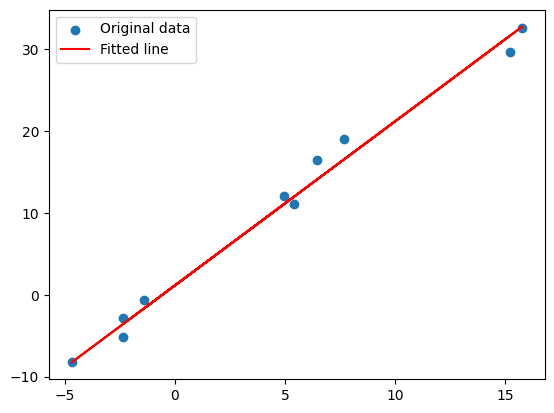

In [12]:
predicted = model(X_tensor).detach().numpy()
plt.scatter(X, y, label='Original data')
plt.plot(X, predicted, 'r-', label='Fitted line')
plt.legend()
plt.show()

In [14]:
new_data = torch.tensor([[1.0],[2.0],[3.0]])
with torch.no_grad():
    predicted_values = model(new_data)
    
p_v_numpy = predicted_values.numpy()
print(p_v_numpy)

[[3.131132 ]
 [5.1346545]
 [7.138177 ]]
